<a href="https://colab.research.google.com/github/Md7tz/Machine-learning-notebooks/blob/master/Computer_Vision_with_Tensorflow_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer vision with TensorFlow

## Get the data

2 classes adopted from [Food 101](https://www.kaggle.com/dansbecker/food-101).

In [1]:
import zipfile

!wget -N https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file

with zipfile.ZipFile("pizza_steak.zip") as file:
  file.extractall()

--2021-10-09 13:22:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘pizza_steak.zip’ not modified on server. Omitting download.



## Inspect the data

In [2]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [3]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('./pizza_steak'):
  print(f"The are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

The are 2 directories and 1 images in './pizza_steak'.
The are 2 directories and 1 images in './pizza_steak/test'.
The are 0 directories and 250 images in './pizza_steak/test/pizza'.
The are 0 directories and 250 images in './pizza_steak/test/steak'.
The are 2 directories and 1 images in './pizza_steak/train'.
The are 0 directories and 750 images in './pizza_steak/train/pizza'.
The are 0 directories and 750 images in './pizza_steak/train/steak'.


In [4]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Oct  9 13:21 .
drwxr-xr-x 1 root root 4096 Oct  9 13:21 ..
-rw-r--r-- 1 root root 6148 Oct  9 13:22 .DS_Store
drwxr-xr-x 4 root root 4096 Oct  9 13:21 test
drwxr-xr-x 4 root root 4096 Oct  9 13:21 train


In [5]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]  # discard .DS_Store
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  images_dir = target_dir.joinpath(target_class)
  images = os.listdir(images_dir)
  rand_index = random.randint(0, len(images))
  img = mpimg.imread(images_dir.joinpath(images[rand_index]))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}") # show the shape of the image
  return img

Image Shape: (512, 512, 3)


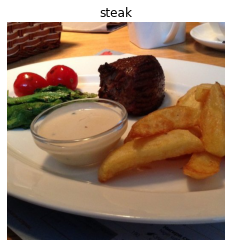

In [8]:
# View a random image from the training data set 
img = view_random_image(data_dir, "steak")

> Images are tensors with different pixels values with rgb channels ranging from 0-255


In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[153, 126, 117],
        [152, 123, 115],
        [155, 122, 115],
        ...,
        [155, 170, 199],
        [156, 171, 200],
        [155, 169, 198]],

       [[153, 126, 115],
        [156, 126, 116],
        [161, 128, 121],
        ...,
        [153, 168, 197],
        [155, 169, 196],
        [153, 167, 194]],

       [[160, 132, 120],
        [160, 130, 119],
        [158, 124, 115],
        ...,
        [152, 166, 193],
        [155, 166, 194],
        [154, 165, 193]],

       ...,

       [[101,  51,  16],
        [103,  53,  18],
        [105,  55,  22],
        ...,
        [ 35,  40,  60],
        [ 35,  40,  62],
        [ 36,  41,  63]],

       [[109,  53,  16],
        [107,  53,  17],
        [106,  52,  18],
        ...,
        [ 36,  41,  63],
        [ 37,  42,  64],
        [ 39,  43,  68]],

       [[118,  60,  22],
        [113,  57,  20],
        [108,  52,  17],
        ...,
        [ 38,  42,  6

In [10]:
# View image shape -> returns width, height, color channels
img.shape

(512, 512, 3)

Normalize - scale from (0 - 255) to (0 - 1) 

In [11]:
# Normalize pixel values
img/255.

array([[[0.6       , 0.49411765, 0.45882353],
        [0.59607843, 0.48235294, 0.45098039],
        [0.60784314, 0.47843137, 0.45098039],
        ...,
        [0.60784314, 0.66666667, 0.78039216],
        [0.61176471, 0.67058824, 0.78431373],
        [0.60784314, 0.6627451 , 0.77647059]],

       [[0.6       , 0.49411765, 0.45098039],
        [0.61176471, 0.49411765, 0.45490196],
        [0.63137255, 0.50196078, 0.4745098 ],
        ...,
        [0.6       , 0.65882353, 0.77254902],
        [0.60784314, 0.6627451 , 0.76862745],
        [0.6       , 0.65490196, 0.76078431]],

       [[0.62745098, 0.51764706, 0.47058824],
        [0.62745098, 0.50980392, 0.46666667],
        [0.61960784, 0.48627451, 0.45098039],
        ...,
        [0.59607843, 0.65098039, 0.75686275],
        [0.60784314, 0.65098039, 0.76078431],
        [0.60392157, 0.64705882, 0.75686275]],

       ...,

       [[0.39607843, 0.2       , 0.0627451 ],
        [0.40392157, 0.20784314, 0.07058824],
        [0.41176471, 0

## Architecture of a CNN
- Input image(s) 
- Input Layer
- Convolutional Layer
- Hidden Activation
- Pooling Layer
- Fully connected layer (Dense)
- Output layer
- Output Activation

 Steps
 * Load images
 * Preprocess images 
 * Build a CNN
 * Compile our CNN
 * Fit to training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess data 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Get datadirs paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from dirs and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  # tf.keras.layers.Activations(tf.nn.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 252ms/step - loss: 0.5361 - accuracy: 0.7240 - val_loss: 0.3665 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4393 - accuracy: 0.8040 - val_loss: 0.3678 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4019 - accuracy: 0.8327 - val_loss: 0.3020 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3757 - accuracy: 0.8367 - val_loss: 0.2921 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3573 - accuracy: 0.8527 - val_loss: 0.3085 - val_accuracy: 0.8740


In [13]:
len(train_data), 1500/32

(47, 46.875)

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using a non CNN model with the data to test the difference 

In [15]:
# Set a random seed
tf.random.set_seed(42)

# Create the model
non_cnn_model = tf.keras.Sequential()
non_cnn_model.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
non_cnn_model.add(tf.keras.layers.Dense(4, activation="relu"))
non_cnn_model.add(tf.keras.layers.Dense(4, activation="relu"))
non_cnn_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
non_cnn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics=["accuracy"])

# Fit the model
history_2 = non_cnn_model.fit(train_data, 
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 1.1736 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
